<a href="https://colab.research.google.com/github/seongheek/econtheory/blob/main/7%EC%A3%BC%EC%B0%A8_%EA%B0%95%EC%9D%98_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B0%80%EA%B3%B5%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **자료 분석을 위한 준비: 데이터 가공하기**
실제 설문자료 조사를 사용하여 데이터를 분석에 맞게 가공하는 연습을 해보자. 수업용 자료는 23년 경제이해력조사의 원데이터에서 10%만 무작위 추출한 데이터이다 (원 조사 참여자 수는 3,000명).

In [1]:
import pandas as pd
import numpy as np

df=pd.read_excel('econliteracy.xlsx', index_col=0)

300명의 조사참여자 자료인 것이 확인된다.

In [2]:
df

,q1,a1,b1,q2,a2,b2,q3,a3,b3,q4,...,A8e,A9_A,A9e,sq1,sq2,ssq2,sq3,sq4,sq5,sq6
ID,,,,,,,,,,,,,,,,,,,,,
1,3,3,1,1,1,1,3,2,0,4,...,NaN,2,NaN,1.0,56,5,2,4,2,6
2,3,3,1,1,1,1,1,2,0,4,...,NaN,2,NaN,NaN,38,3,2,5,3,6
3,3,3,1,1,1,1,2,2,1,4,...,NaN,4,NaN,1.0,36,3,1,5,3,4
4,2,3,0,3,1,0,1,2,0,3,...,NaN,2,NaN,2.0,62,6,1,7,3,1
5,3,3,1,1,1,1,2,2,1,2,...,NaN,6,NaN,2.0,33,3,7,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1,3,0,1,1,1,2,2,1,4,...,NaN,4,NaN,2.0,38,3,13,7,3,1
297,3,3,1,2,1,0,3,2,0,1,...,NaN,2,NaN,1.0,54,5,1,3,2,7
298,3,3,1,1,1,1,2,2,1,3,...,NaN,1,NaN,1.0,74,7,9,2,3,3


이 표본의 평균 경제이해력 점수는 57.67점이다.

In [3]:
df['score'].describe()

,score
count,300.000000
mean,57.666667
std,19.841906
min,15.000000
25%,45.000000
50%,60.000000
75%,70.000000
max,100.000000


히스토그램으로 경제이해력 점수의 분포를 확인해보자.

<Axes: >

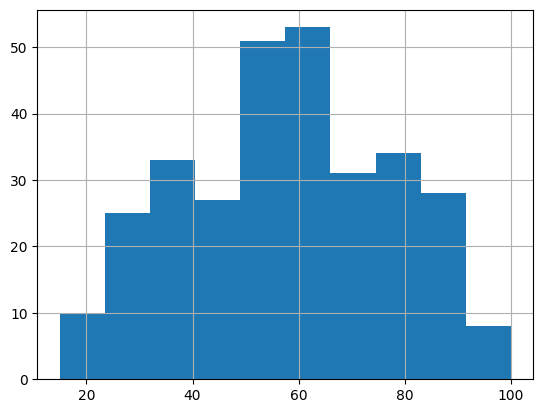

In [4]:
df['score'].hist()

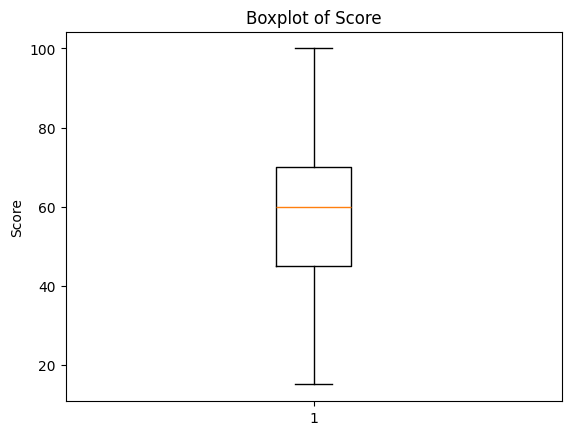

In [5]:
import matplotlib.pyplot as plt

plt.boxplot(df['score'])
plt.title('Boxplot of Score')
plt.ylabel('Score')
plt.show()

변수명을 직관적으로 바꿔보자.


*   기본적인 정보(성별, 교육수준, 소득, 직업, 지역 등)은 대체로 분석에 포함되기 때문에 해당 변수들을 알아보기 쉬운 이름으로 바꾼다.



In [6]:
df = df.rename(columns={'sq1': 'gender', 'sq2': 'age', 'sq3': 'region', 'sq4': 'job', 'sq5': 'edu', 'sq6': 'income'})
df

,q1,a1,b1,q2,a2,b2,q3,a3,b3,q4,...,A8e,A9_A,A9e,gender,age,ssq2,region,job,edu,income
ID,,,,,,,,,,,,,,,,,,,,,
1,3,3,1,1,1,1,3,2,0,4,...,NaN,2,NaN,1.0,56,5,2,4,2,6
2,3,3,1,1,1,1,1,2,0,4,...,NaN,2,NaN,NaN,38,3,2,5,3,6
3,3,3,1,1,1,1,2,2,1,4,...,NaN,4,NaN,1.0,36,3,1,5,3,4
4,2,3,0,3,1,0,1,2,0,3,...,NaN,2,NaN,2.0,62,6,1,7,3,1
5,3,3,1,1,1,1,2,2,1,2,...,NaN,6,NaN,2.0,33,3,7,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1,3,0,1,1,1,2,2,1,4,...,NaN,4,NaN,2.0,38,3,13,7,3,1
297,3,3,1,2,1,0,3,2,0,1,...,NaN,2,NaN,1.0,54,5,1,3,2,7
298,3,3,1,1,1,1,2,2,1,3,...,NaN,1,NaN,1.0,74,7,9,2,3,3


각 변수들 중 누락된 관측치가 있는지 살펴본다.


*   특히 성별이나 나이와 같은 분석에 필수적으로 들어가는 요인들의 누락된 관측치는 미리 제거하고 분석하는 것이 좋다.

*   예시로 성별을 살펴보자.


In [7]:
df['gender'].value_counts()   #30명 중 297명만 성별 정보가 있음

,count
gender,
1.0,160
2.0,137


In [8]:
df['gender'].isnull()

,gender
ID,
1,False
2,True
3,False
4,False
5,False
...,...
296,False
297,False
298,False


In [9]:
#몇개가 누락되었는지 확인

missing = df['gender'].isnull().sum()
print(missing)

3


In [10]:
df=df.dropna(subset=['gender'])        #성별 정보가 누락된 개인들은 샘플에서 제거한다.

이제 누락정보가 있는 개인은 제거하여 297명의 데이터로 확정하였다. 대체로 모든 변수에서 한두개 정도의 누락 관측치가 있다. 분석에 들어가는 모든 변수들의 누락 관측치는 이렇게 미리 제거하여 분석 표본을 확정하면 된다.

In [11]:
df

,q1,a1,b1,q2,a2,b2,q3,a3,b3,q4,...,A8e,A9_A,A9e,gender,age,ssq2,region,job,edu,income
ID,,,,,,,,,,,,,,,,,,,,,
1,3,3,1,1,1,1,3,2,0,4,...,NaN,2,NaN,1.0,56,5,2,4,2,6
3,3,3,1,1,1,1,2,2,1,4,...,NaN,4,NaN,1.0,36,3,1,5,3,4
4,2,3,0,3,1,0,1,2,0,3,...,NaN,2,NaN,2.0,62,6,1,7,3,1
5,3,3,1,1,1,1,2,2,1,2,...,NaN,6,NaN,2.0,33,3,7,3,3,2
6,1,3,0,1,1,1,2,2,1,4,...,NaN,1,NaN,2.0,63,6,9,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1,3,0,1,1,1,2,2,1,4,...,NaN,4,NaN,2.0,38,3,13,7,3,1
297,3,3,1,2,1,0,3,2,0,1,...,NaN,2,NaN,1.0,54,5,1,3,2,7
298,3,3,1,1,1,1,2,2,1,3,...,NaN,1,NaN,1.0,74,7,9,2,3,3


성별 경제이해력 점수를 살펴보자.

In [12]:
# 성별 평균 경제이해력 점수

print(df.groupby('gender')['score'].mean())


gender
1.0    59.312500
2.0    55.255474
Name: score, dtype: float64


현재 분석에 안 쓰는 변수가 많으므로 좀 정리해주자.

In [13]:
#필요없는 변수 제거

df.drop(['A9e'], axis=1)

,q1,a1,b1,q2,a2,b2,q3,a3,b3,q4,...,A8_2,A8e,A9_A,gender,age,ssq2,region,job,edu,income
ID,,,,,,,,,,,,,,,,,,,,,
1,3,3,1,1,1,1,3,2,0,4,...,2,NaN,2,1.0,56,5,2,4,2,6
3,3,3,1,1,1,1,2,2,1,4,...,2,NaN,4,1.0,36,3,1,5,3,4
4,2,3,0,3,1,0,1,2,0,3,...,4,NaN,2,2.0,62,6,1,7,3,1
5,3,3,1,1,1,1,2,2,1,2,...,3,NaN,6,2.0,33,3,7,3,3,2
6,1,3,0,1,1,1,2,2,1,4,...,1,NaN,1,2.0,63,6,9,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1,3,0,1,1,1,2,2,1,4,...,3,NaN,4,2.0,38,3,13,7,3,1
297,3,3,1,2,1,0,3,2,0,1,...,1,NaN,2,1.0,54,5,1,3,2,7
298,3,3,1,1,1,1,2,2,1,3,...,7,NaN,1,1.0,74,7,9,2,3,3


q1-q20, a1-a20 도 지워주자.

In [14]:
columns_to_drop = [f'q{i}' for i in range(1, 21)]  # 리스트 만들기 ['q1', 'q2', ..., 'q20']
df = df.drop(columns=columns_to_drop, axis=1)       # 리스트 열 지우기

In [15]:
df

,a1,b1,a2,b2,a3,b3,a4,b4,a5,b5,...,A8e,A9_A,A9e,gender,age,ssq2,region,job,edu,income
ID,,,,,,,,,,,,,,,,,,,,,
1,3,1,1,1,2,0,4,1,1,1,...,NaN,2,NaN,1.0,56,5,2,4,2,6
3,3,1,1,1,2,1,4,1,1,1,...,NaN,4,NaN,1.0,36,3,1,5,3,4
4,3,0,1,0,2,0,4,0,1,0,...,NaN,2,NaN,2.0,62,6,1,7,3,1
5,3,1,1,1,2,1,4,0,1,1,...,NaN,6,NaN,2.0,33,3,7,3,3,2
6,3,0,1,1,2,1,4,1,1,0,...,NaN,1,NaN,2.0,63,6,9,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,3,0,1,1,2,1,4,1,1,1,...,NaN,4,NaN,2.0,38,3,13,7,3,1
297,3,1,1,0,2,0,4,0,1,0,...,NaN,2,NaN,1.0,54,5,1,3,2,7
298,3,1,1,1,2,1,4,0,1,0,...,NaN,1,NaN,1.0,74,7,9,2,3,3


In [16]:
columns_to_drop2 = [f'a{i}' for i in range(1, 21)]  # 리스트 만들기 ['a1', 'a2', ..., 'a20']
df = df.drop(columns=columns_to_drop2, axis=1)       # 리스트 열 지우기

In [17]:
df

,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,...,A8e,A9_A,A9e,gender,age,ssq2,region,job,edu,income
ID,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,1,1,1,0,1,1,0,...,NaN,2,NaN,1.0,56,5,2,4,2,6
3,1,1,1,1,1,1,1,0,1,1,...,NaN,4,NaN,1.0,36,3,1,5,3,4
4,0,0,0,0,0,1,0,1,1,0,...,NaN,2,NaN,2.0,62,6,1,7,3,1
5,1,1,1,0,1,1,0,1,1,0,...,NaN,6,NaN,2.0,33,3,7,3,3,2
6,0,1,1,1,0,1,0,1,1,1,...,NaN,1,NaN,2.0,63,6,9,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,1,1,1,1,1,1,1,1,1,...,NaN,4,NaN,2.0,38,3,13,7,3,1
297,1,0,0,0,0,1,1,0,0,1,...,NaN,2,NaN,1.0,54,5,1,3,2,7
298,1,1,1,0,0,0,0,0,0,1,...,NaN,1,NaN,1.0,74,7,9,2,3,3


# **산포도 그리기**


*   연령과 경제이해력 점수간 관계를 산포도로 나타내보자.



In [18]:
df['score'].dtype        #숫자 형태인지 확인

dtype('int64')

In [19]:
df['age'].dtype

dtype('int64')

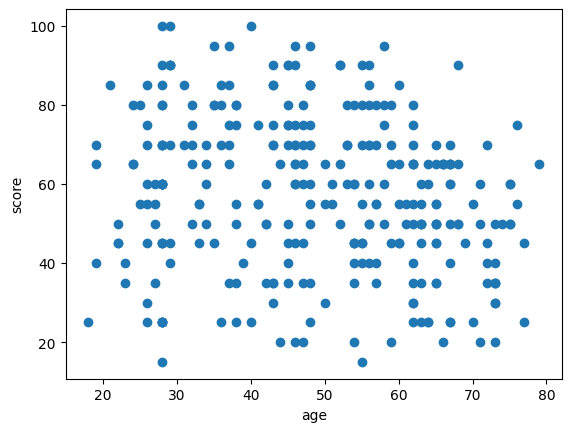

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(df['age'], df['score'])
plt.xlabel('age')
plt.ylabel('score')
plt.show()

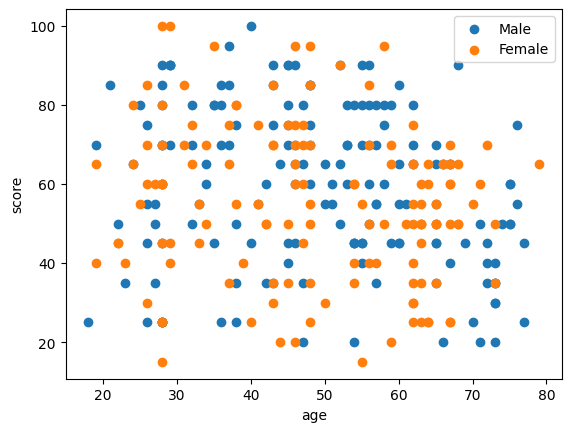

In [21]:
#성별로 따로 그리기

male_df = df[df['gender'] == 1]
female_df = df[df['gender'] == 2]

plt.scatter(male_df['age'], male_df['score'], label='Male')
plt.scatter(female_df['age'], female_df['score'], label='Female')
plt.xlabel('age')
plt.ylabel('score')
plt.legend()
plt.show()

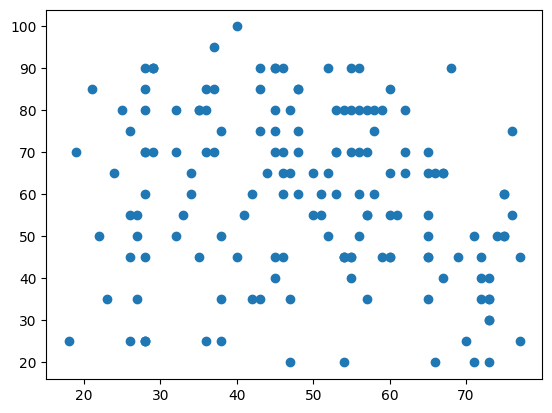

In [22]:
#남성만 그리기
plt.scatter(male_df['age'], male_df['score'])

SEABORN으로도 산포도를 그릴 수 있다.

<Axes: xlabel='age', ylabel='score'>

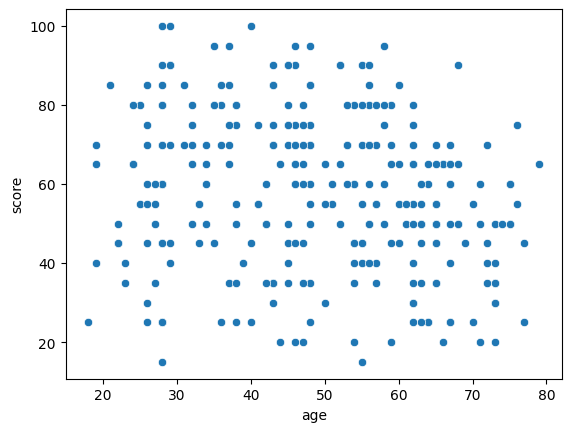

In [23]:
import seaborn as sns

sns.scatterplot(x = 'age', y = 'score', data=df)

<Axes: xlabel='age', ylabel='score'>

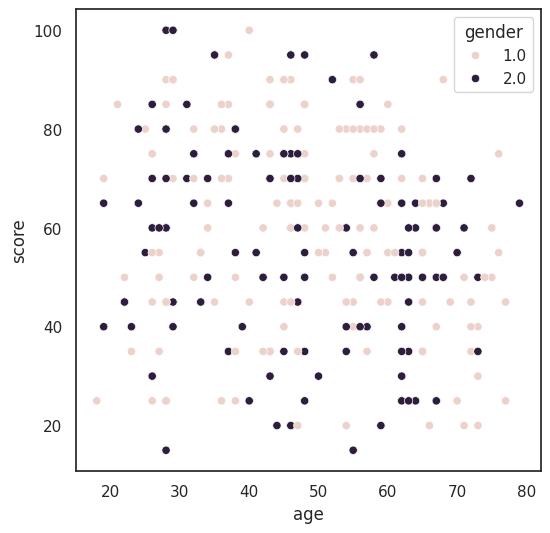

In [24]:
import seaborn as sns

sns.set_theme(rc={'figure.figsize' : (6,6)}, style='white')                   # style은 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks' 가 있다.

sns.scatterplot(x = 'age', y = 'score', hue='gender', data=df)

In [25]:
gendercategories = {1: "Male", 2: "Female"}
df['gender']=df['gender'].map(gendercategories)

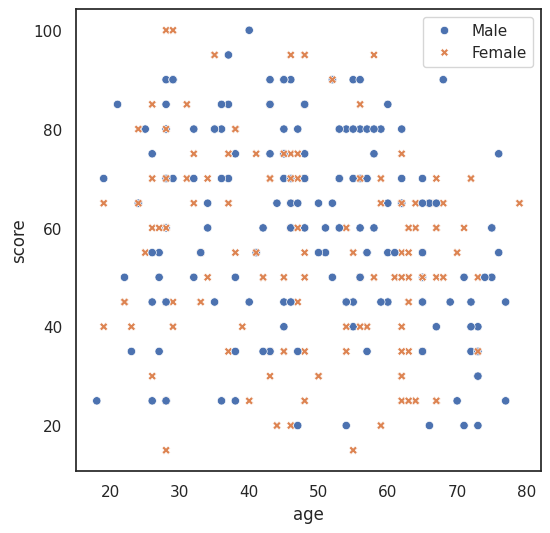

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt



sns.scatterplot(x = 'age', y = 'score', hue='gender', style='gender', data=df)

plt.legend(title=None)

plt.show()


In [27]:
df

,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,...,A8e,A9_A,A9e,gender,age,ssq2,region,job,edu,income
ID,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,1,1,1,0,1,1,0,...,NaN,2,NaN,Male,56,5,2,4,2,6
3,1,1,1,1,1,1,1,0,1,1,...,NaN,4,NaN,Male,36,3,1,5,3,4
4,0,0,0,0,0,1,0,1,1,0,...,NaN,2,NaN,Female,62,6,1,7,3,1
5,1,1,1,0,1,1,0,1,1,0,...,NaN,6,NaN,Female,33,3,7,3,3,2
6,0,1,1,1,0,1,0,1,1,1,...,NaN,1,NaN,Female,63,6,9,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,1,1,1,1,1,1,1,1,1,...,NaN,4,NaN,Female,38,3,13,7,3,1
297,1,0,0,0,0,1,1,0,0,1,...,NaN,2,NaN,Male,54,5,1,3,2,7
298,1,1,1,0,0,0,0,0,0,1,...,NaN,1,NaN,Male,74,7,9,2,3,3


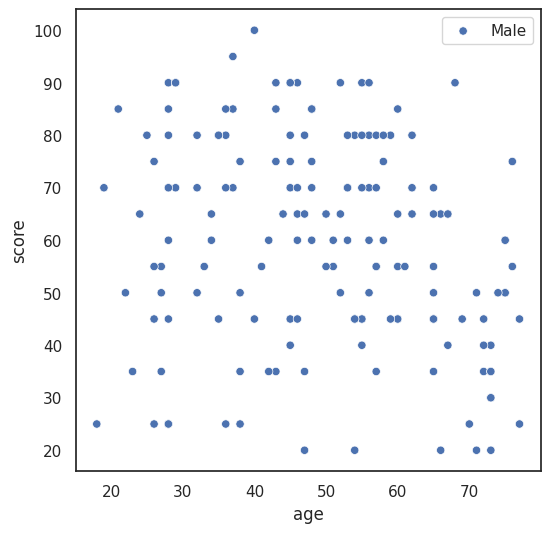

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='age', y='score', hue='gender', data=male_df)

plt.legend(labels=['Male'])
plt.show()

# 연습문제: **여성의** 나이와 경제이해력 간의 산포도를 그려보세요.

In [29]:
df2=df[['score', 'age', 'job', 'edu', 'income']]

In [30]:
df2

,score,age,job,edu,income
ID,,,,,
1,80,56,4,2,6
3,80,36,5,3,4
4,30,62,7,3,1
5,45,33,3,3,2
6,50,63,3,2,3
...,...,...,...,...,...
296,80,38,7,3,1
297,45,54,3,2,7
298,50,74,2,3,3


In [31]:
df2.drop(['income'], axis=1)

,score,age,job,edu
ID,,,,
1,80,56,4,2
3,80,36,5,3
4,30,62,7,3
5,45,33,3,3
6,50,63,3,2
...,...,...,...,...
296,80,38,7,3
297,45,54,3,2
298,50,74,2,3


<Axes: >

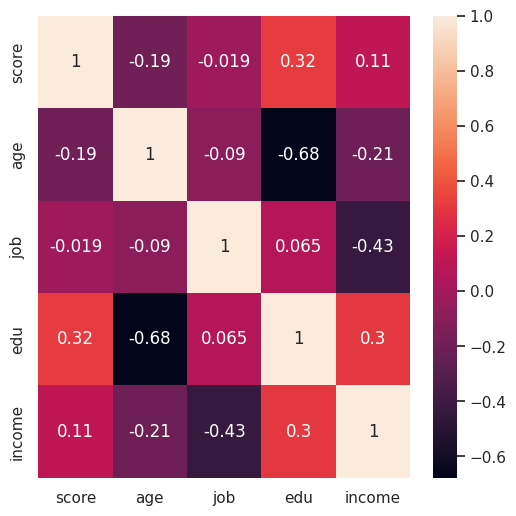

In [32]:
import seaborn as sns
sns.heatmap(df2.corr(), annot=True)    # 색깔은 원하는 색 참고 https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/


# **연습: 데이터프레임에서 'job'을 삭제하고, 히트맵을 다시 그려보세요.**

https://padlet.com/nathalieskim/7-wi0dx54pmg7mz4rf